In [52]:
#import cv2
import json
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#import matplotlib.patches as patches

# we need to append the root directory to the path to import data.py\n",
sys.path.append('..')
import data
import preprocessing
import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
params = utils.yaml_to_dict('../config.yml')
params['data_dir'] = os.path.join('..', params['data_dir'])
params['data_dir_lfw'] = os.path.join('..', params['data_dir_lfw'])
params

{'file_list': ['lfw.tgz',
  'lfw-names.txt',
  'training.txt',
  'validation.txt',
  'test.txt',
  'labels.json'],
 'dataset_name': 'lfw',
 'url_dataset': 'http://vis-www.cs.umass.edu/lfw/lfw.tgz',
 'url_metadata': 'http://vis-www.cs.umass.edu/lfw/lfw-names.txt',
 'batch_size': 16,
 'learning_rate': 0.001,
 'max_steps': 1500,
 'data_dir': '..\\dataset',
 'data_dir_lfw': '..\\dataset\\lfw',
 'labels_json': 'labels.json',
 'model_dir': 'checkpoints',
 'shuffle': True,
 'shuffle_buffer': 5000,
 'image_shape': [250, 250],
 'eval_steps': 10,
 'keep_checkpoint_max': 3,
 'log_frequency': 20,
 'save_checkpoints_steps': 20,
 'save_summary_steps': 20,
 'start_delay_secs': 10}

In [54]:
train_data_set = data._sources(params)

In [55]:
data_input_fn = data.input_fn(train_data_set, True, params)

*********ENTRE UNA VEZ ACÁ*********


In [56]:
data_input_fn

({'image': <tf.Tensor 'IteratorGetNext_6:0' shape=(?, ?, ?, 3) dtype=uint8>},
 <tf.Tensor 'IteratorGetNext_6:1' shape=(?,) dtype=int32>)

In [57]:
with tf.Session() as sess:
    elements = sess.run(data_input_fn)

In [58]:
label_json_path = os.path.join(params['data_dir'], params['labels_json'])
with open(label_json_path, 'r') as file:
    label_dict = json.load(file)
    
labels_json_dict = {k:v for k,v in enumerate(label_dict)}

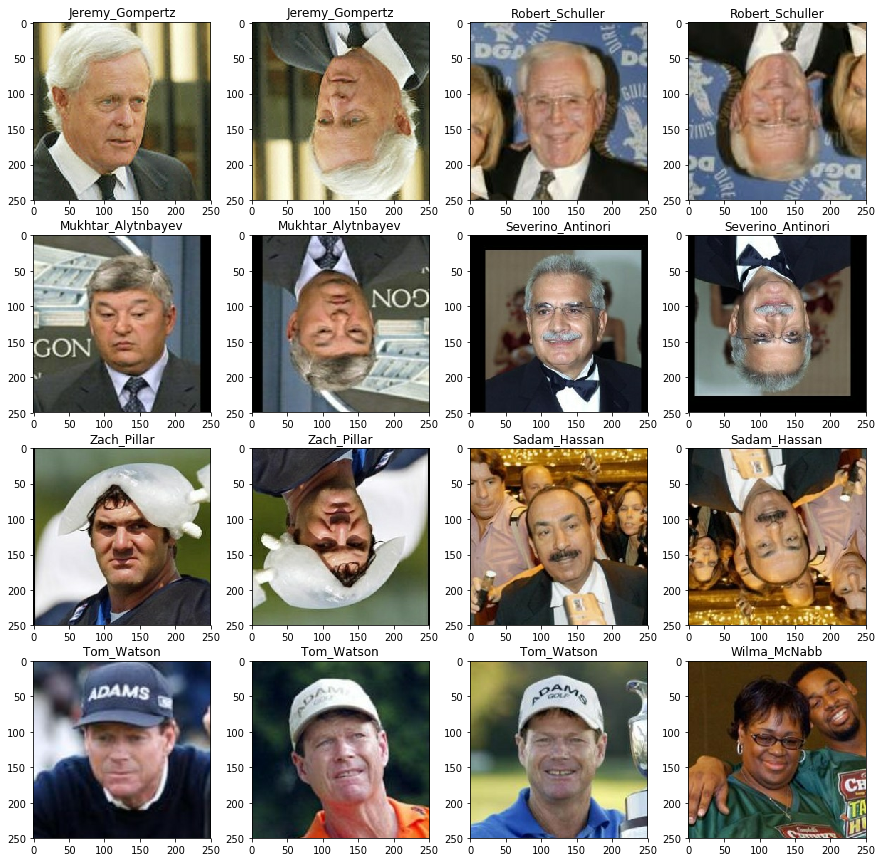

In [59]:
fig, axis = plt.subplots(4,4, figsize=(15,15))
k = 0
for i in range(4):
    for j in range(4):
        img = np.uint8(elements[0]['image'][k])
        title = labels_json_dict[elements[1][k]]
        axis[i][j].set_title('Data')
        axis[i][j].imshow(img)
        axis[i][j].title.set_text(title)
        k += 1
plt.show()